VAE loss -            $min  \mathbb{E}_q[log q(z|x) - log p(z)] - \mathbb{E}_q[log p(x|z)]$

###KL loss

KL term --          $min  \mathbb{E}_q[log q(z|x) - log p(z)]$

In [ ]:
import torch
q = torch.distributions.Normal(2,4)
z = q.rsample()
z

tensor(1.3722)

In [ ]:
p = torch.distributions.Normal(0,1)
q = torch.distributions.Normal(2,4)

log_pz = p.log_prob(z)
logqz = q.log_prob(z)
print("log prob pz" , log_pz , "   prob " , torch.exp(log_pz))
print("log prob pz" , logqz , "   prob " , torch.exp(logqz))


log prob pz tensor(-1.8604)    prob  tensor(0.1556)
log prob pz tensor(-2.3176)    prob  tensor(0.0985)


Notice that z has almost zero probability of having come from p. But has 6% probability of having come from q

You can see that we are minimizing the difference between these probabilities.

In [ ]:
kl = logqz - log_pz
kl

tensor(-0.4572)

So, to maximize the probability of z under p, we have to shift q closer to p, so that when we sample a new z from q, that value will have a much higher probability.

two normal distributions, p and q, and then calculates the log-probabilities of a value z under each distribution.

The torch.distributions.Normal class is a PyTorch class that represents a normal distribution. The constructor for this class takes two arguments: the mean and the standard deviation of the distribution.

The log_prob method of the torch.distributions.Normal class calculates the log-probability of a value z under the distribution. The log-probability is a measure of how likely it is that the distribution will produce the value z.

In [ ]:
q = torch.distributions.Normal(1,2)
log_pz = p.log_prob(z)
logqz = q.log_prob(z)
print("log prob pz" , log_pz , "   prob " , torch.exp(log_pz))
print("log prob pz" , logqz , "   prob " , torch.exp(logqz))
kl = logqz - log_pz
kl
#dec in kl as two distribution goes closer

log prob pz tensor(-1.8604)    prob  tensor(0.1556)
log prob pz tensor(-1.6294)    prob  tensor(0.1960)


tensor(0.2310)

The Kullback-Leibler (KL) divergence is a measure of how different two probability distributions are. It is defined as the following:


$D_{KL}(p||q) = \int_\mathcal{X} p(x) \log \frac{p(x)}{q(x)} dx$

where p and q are the two probability distributions, and X is the space of possible values.

The KL divergence can be difficult to compute analytically, especially for complex distributions. However, it can be approximated using Monte Carlo methods.

The basic idea of Monte Carlo KL divergence is to sample from the two distributions and then use the samples to estimate the KL divergence. This can be done as follows:

Draw N samples from p.
Draw M samples from q.
Compute the following:

$\hat{D}_{KL}(p||q) = \frac{1}{N} \sum_{i=1}^N \log \frac{p(x_i)}{q(x_i)}$

where x 
1
​
 ,x 
2
​
 ,...,x 
N
​
  are the samples from p.

The Monte Carlo estimate  
  
KL
​
 (p∣∣q) will converge to the true KL divergence D 
KL
​
 (p∣∣q) as N and M go to infinity.

Monte Carlo KL divergence can be used to compare the similarity of two probability distributions. For example, if  

KL
​
 (p∣∣q) is small, then the two distributions are similar. If  

KL
​
 (p∣∣q) is large, then the two distributions are different.

Monte Carlo KL divergence can also be used to train machine learning models. For example, it can be used to train models to generate new data that is similar to a given dataset.

In [ ]:
def kl_divergence(self , z , mu,std):
  p = torch.distributions.Normal(torch.zeros_like(mu),torch.ones_like(std))
  q = torch.distributions.Normal(mu,std)

  log_pz = p.log_prob(z)
  log_qz = q.log_prob(z)

  kl = (log_qz - log_pz)
  
  return kl.sum(-1)

###Reconstruction loss

Reconstruction loss - $\mathbb{E}_q[log p(x|z)]$

we again sample z from q. But now we use that z to calculate the probability of seeing the input x (ie: a color image in this case) given the z that we sampled.

z is latent and x is output from decoder


```
x_hat = vae.decoder(z)
```


x_hat IS NOT an image. These are PARAMETERS for a distribution.To finalize the calculation of this formula, we use x_hat to parametrize a likelihood distribution (in this case a normal again) so that we can measure the probability of the input (image) under this high dimensional distribution.


```
log_scale=  nn.Parameters(torch.tensor([0.0])
scale = torch.exp(log_scale)  -- > 1.
dist = torch.distribution.Normal(x_hat , scale)  --->    mean - x_hat , std = 1.0
log_pxz = dist.log_prob(x)

log_pxz = log_pxz.sum(1,2,3)
recon_los = log_pxz

```



###training loop



```
self.fc_mu = nn.Linear(enc_out_dim, latent_dim)
  self.fc_var = nn.Linear(enc_out_dim, latent_dim)

  # for the gaussian likelihood
  self.log_scale = nn.Parameter(torch.Tensor([0.0]))


  def training_step(self, batch, batch_idx):
      x, _ = batch

      # encode x to get the mu and variance parameters
      x_encoded = self.encoder(x)
      mu, log_var = self.fc_mu(x_encoded), self.fc_var(x_encoded)

      # sample z from q
      std = torch.exp(log_var / 2)
      q = torch.distributions.Normal(mu, std)
      z = q.rsample()

      # decoded
      x_hat = self.decoder(z)

      # reconstruction loss
      recon_loss = self.gaussian_likelihood(x_hat, self.log_scale, x)

      # kl
      kl = self.kl_divergence(z, mu, std)

      # elbo
      elbo = (kl - recon_loss)
      elbo = elbo.mean()```



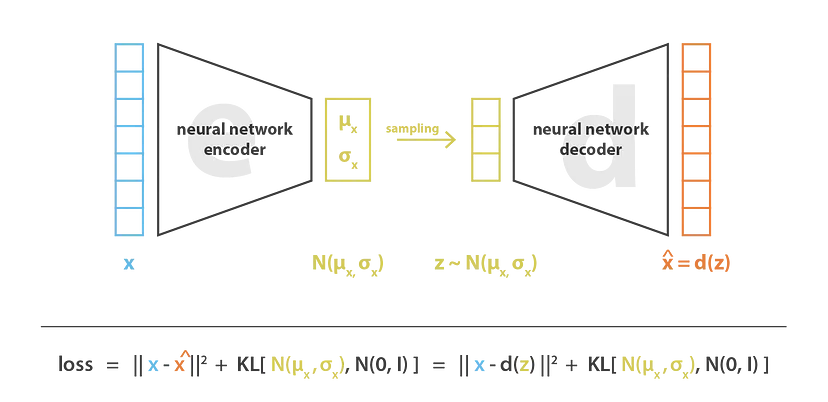

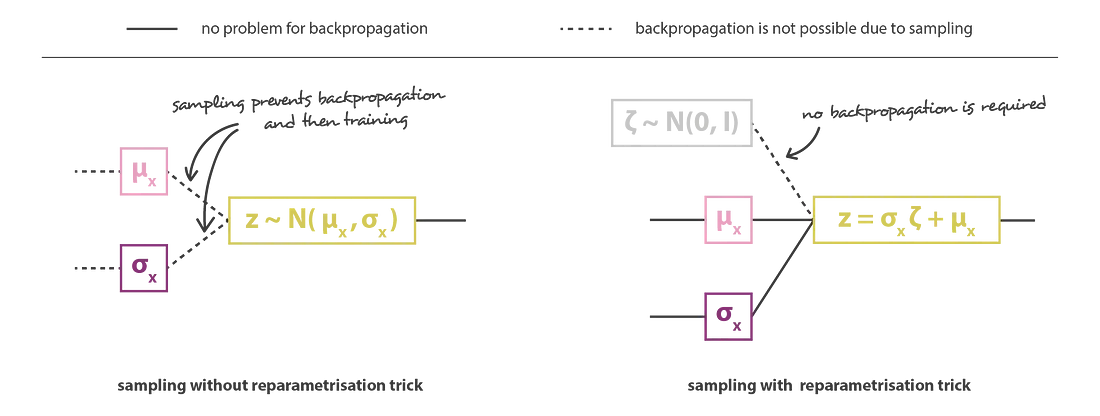




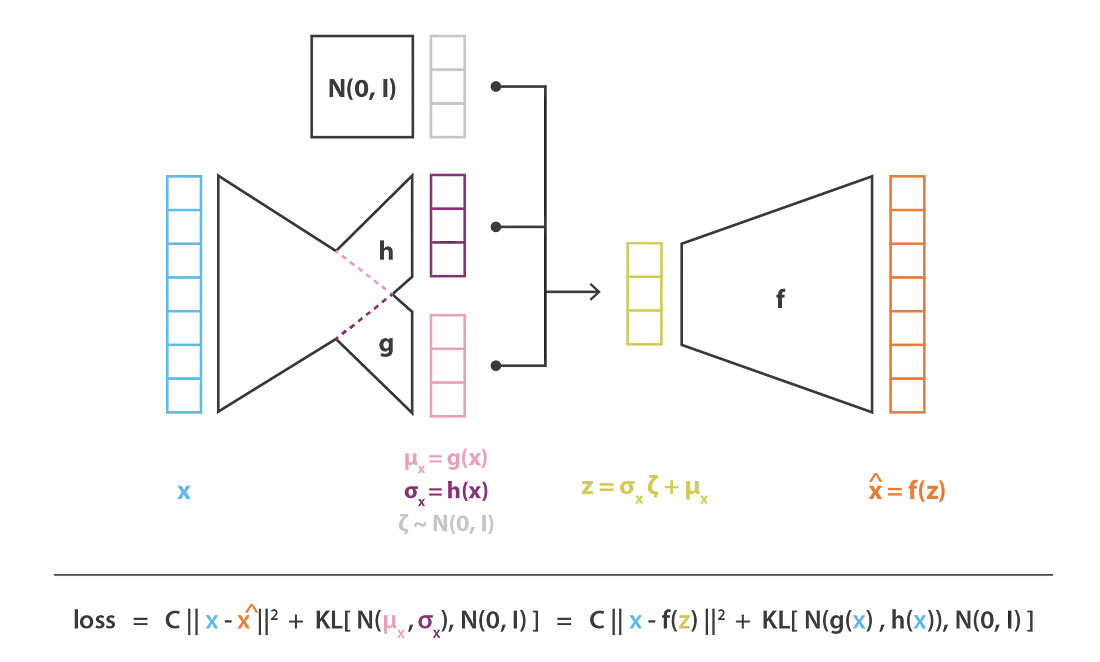